In [2]:
#164 MINUTI
import sys
sys.path.append('../')

import numpy as np
import matplotlib.pyplot as plt
import matplotlib 
import torch
import copy
import random
import importlib

import FullRankRNN as rnn
import Reinforce as rln

In [12]:
actor_rewards = torch.load("models/actor_rewards.pt")
errors = torch.load("models/actor_errors.pt")
errors = np.asarray([errors])[0,:]/20
critic_losses = torch.load("models/critic_loss.pt")

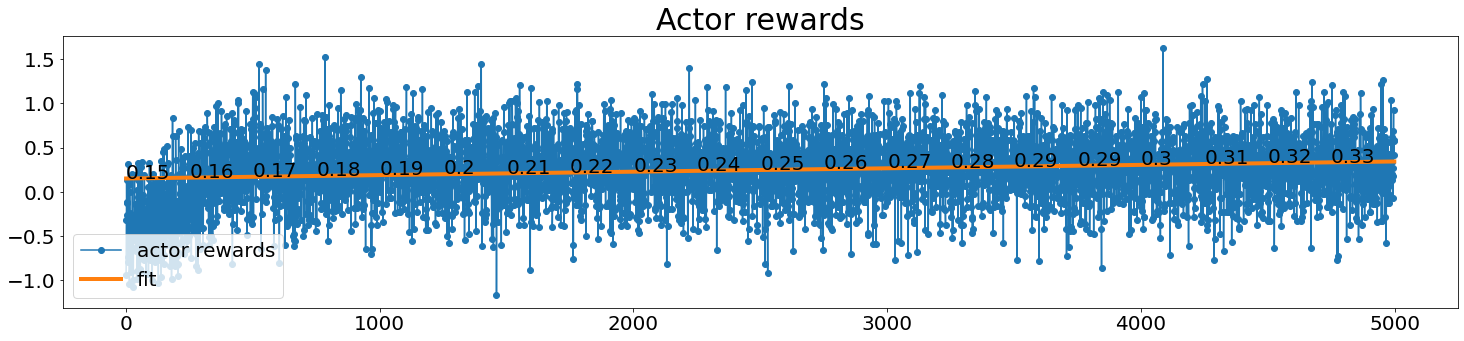

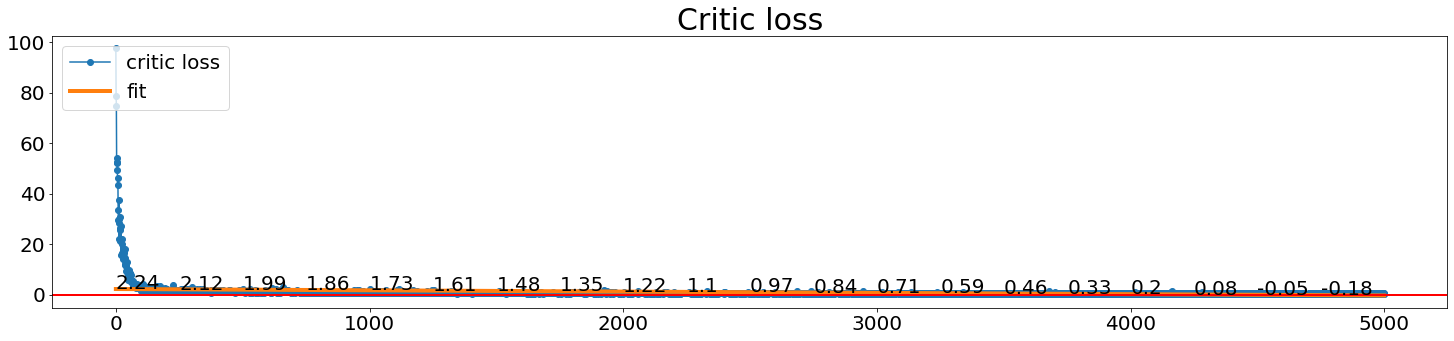

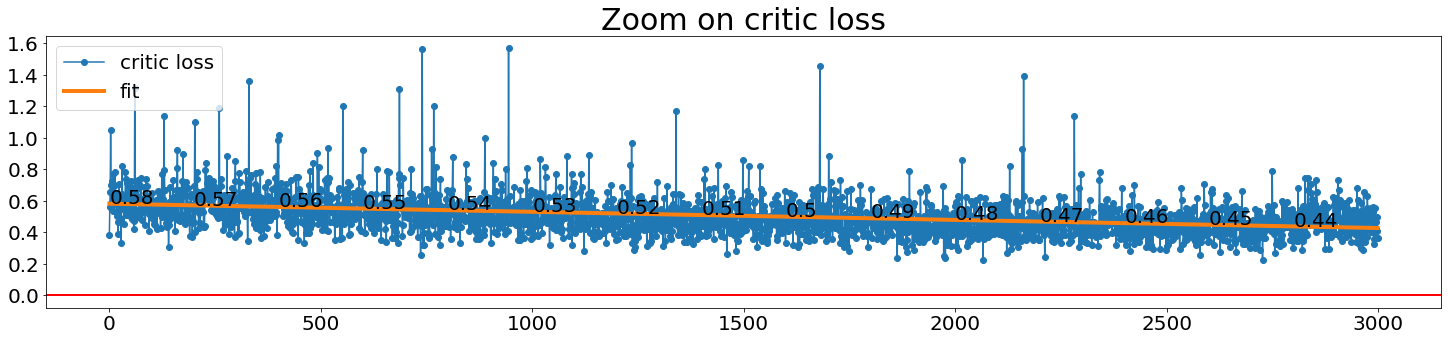

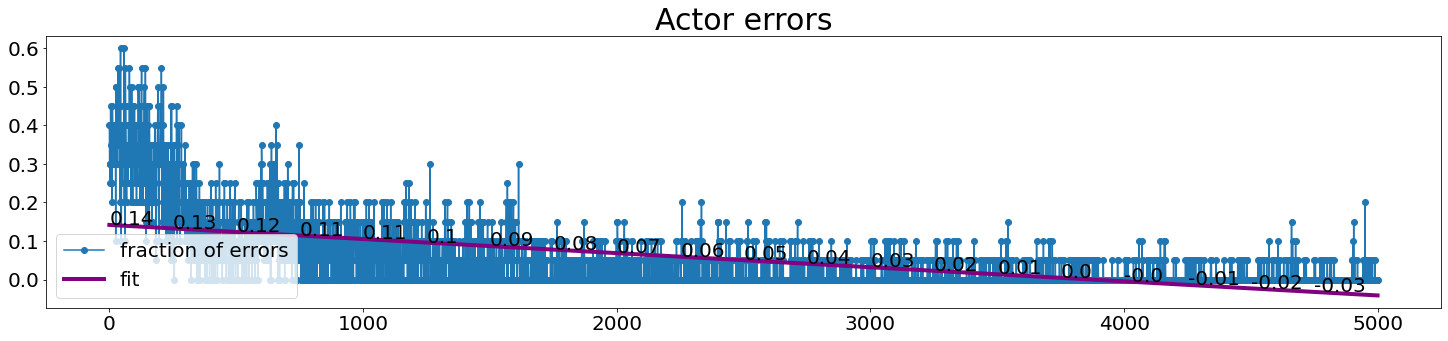

In [13]:
plt.figure(figsize=(25,5))

length = np.linspace(0, len(critic_losses)-1, len(critic_losses))
fit = np.polyfit(length, actor_rewards, 1)
fit2 = np.polyfit(length, errors, 1)

plt.plot(length, actor_rewards, "-o", label="actor rewards")
plt.plot(length, fit[1]+length*fit[0], "-", linewidth=4, label="fit")

for i in range(int(len(critic_losses)/250)):
    plt.text(length[250*i], fit[1]+length[250*i]*fit[0], str(round(fit[1]+length[250*i]*fit[0], 2)), fontsize=20, color="black")
    
plt.xticks(size=20)
plt.yticks(size=20)
plt.legend(fontsize=20, loc="lower left")
plt.title("Actor rewards", fontsize=30)

#==========================================================================================================================================

plt.figure(figsize=(25,5))
    
fit3 = np.polyfit(length, critic_losses, 1)

plt.plot(length, critic_losses, "-o", label="critic loss")
plt.plot(length, fit3[1]+length*fit3[0], "-", linewidth=4, label="fit")
plt.axhline(0, linewidth=2, color="red")

for i in range(int(len(length)/250)):
    plt.text(length[250*i], fit3[1]+length[250*i]*fit3[0], str(round(fit3[1]+length[250*i]*fit3[0], 2)), fontsize=20, color="black")

plt.xticks(size=20)
plt.yticks(size=20)
#plt.ylim(0,0.5)
plt.legend(fontsize=20, loc="upper left")
plt.title("Critic loss", fontsize=30)

#==========================================================================================================================================

plt.figure(figsize=(25,5))
    
length_b = np.linspace(0, len(critic_losses[2000:])-1, len(critic_losses[2000:]))
fit3_b = np.polyfit(length_b, critic_losses[2000:], 1)

plt.plot(length_b, critic_losses[2000:], "-o", label="critic loss")
plt.plot(length_b, fit3_b[1]+length_b*fit3_b[0], "-", linewidth=4, label="fit")
plt.axhline(0, linewidth=2, color="red")

for i in range(int(len(length_b)/200)):
    plt.text(length_b[200*i], fit3_b[1]+length_b[200*i]*fit3_b[0], str(round(fit3_b[1]+length_b[200*i]*fit3_b[0], 2)), fontsize=20, color="black")

plt.xticks(size=20)
plt.yticks(size=20)
#plt.ylim(0,0.5)
plt.legend(fontsize=20, loc="upper left")
plt.title("Zoom on critic loss", fontsize=30)

#==========================================================================================================================================

plt.figure(figsize=(25,5))

fit2 = np.polyfit(length, errors, 1)

plt.plot(length, errors, "-o", label="fraction of errors")
plt.plot(length, fit2[1]+length*fit2[0], "-", linewidth=4, label="fit", color="purple")

for i in range(int(len(critic_losses)/250)):
    plt.text(length[250*i], fit2[1]+length[250*i]*fit2[0], str(round(fit2[1]+length[250*i]*fit2[0], 2)), fontsize=20, color="black")
    
plt.xticks(size=20)
plt.yticks(size=20)
plt.legend(fontsize=20, loc="lower left")
plt.title("Percentage of actor errors", fontsize=30);

In [14]:
reinforce = rln.REINFORCE(name_load_actor="models/RL_actor_network.pt",
                          name_load_critic="models/RL_critic_network.pt")

In [16]:
iterations = 200
observations, rewards, actions, log_action_probs, entropies, values, trial_begins, errors = reinforce.experience(iterations)
print(len(errors), errors+1)

iteration 100
iteration 200
0 []


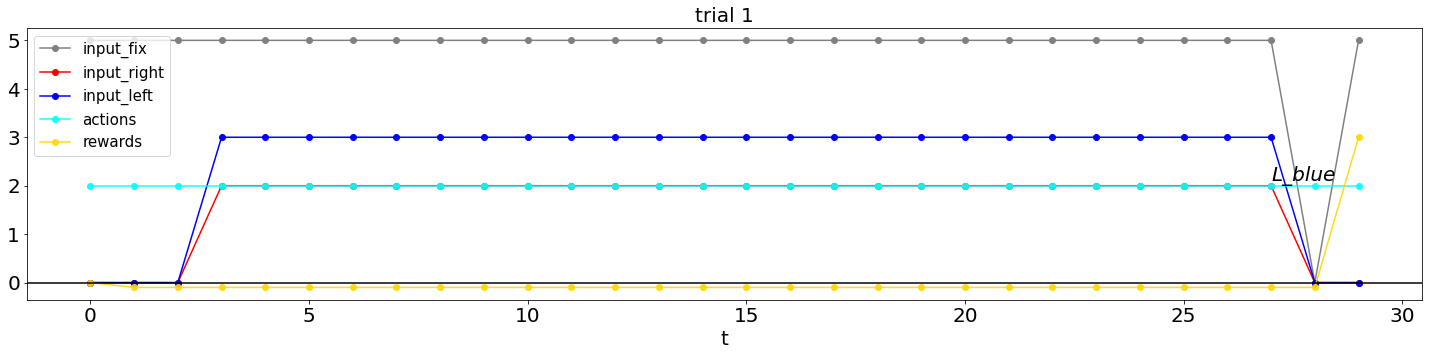

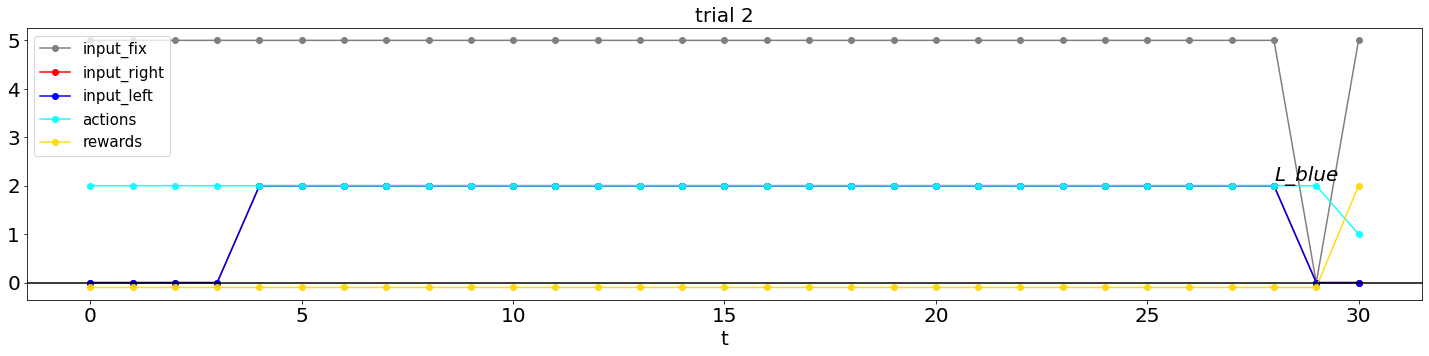

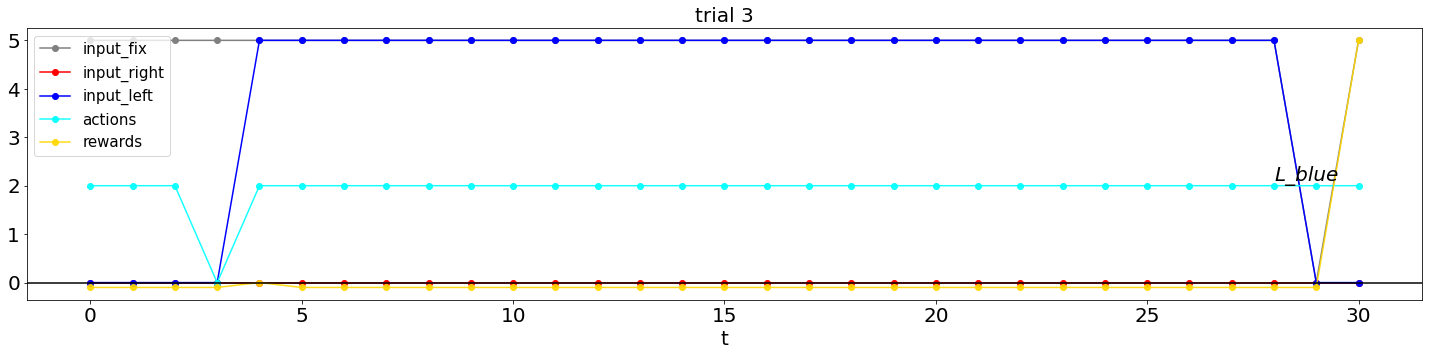

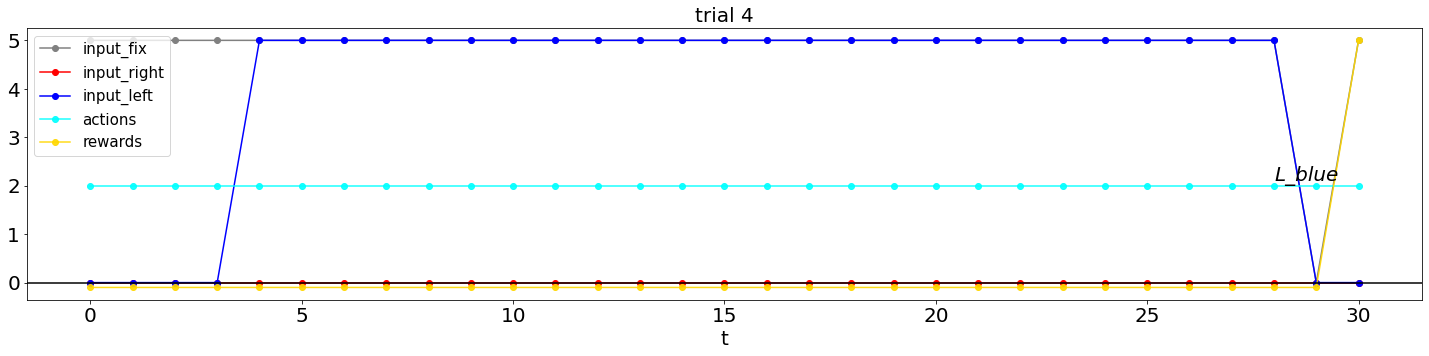

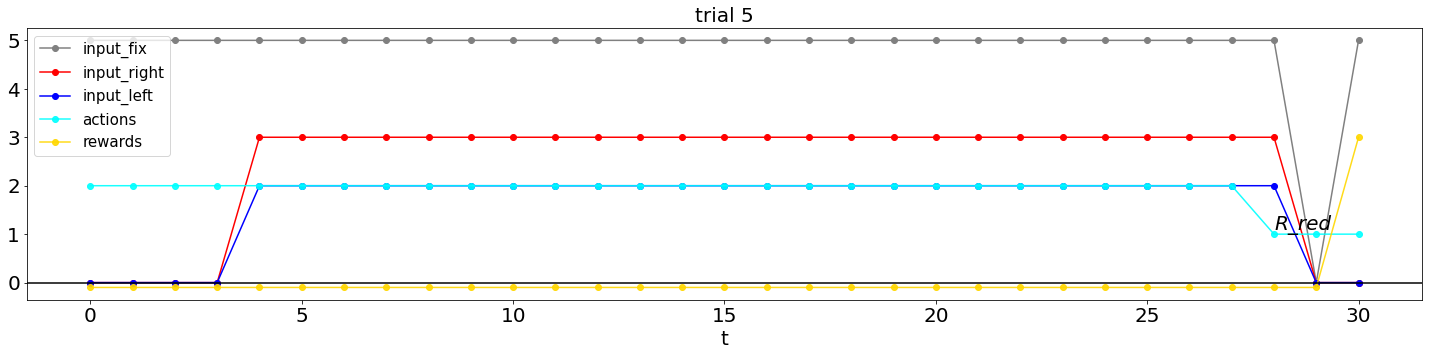

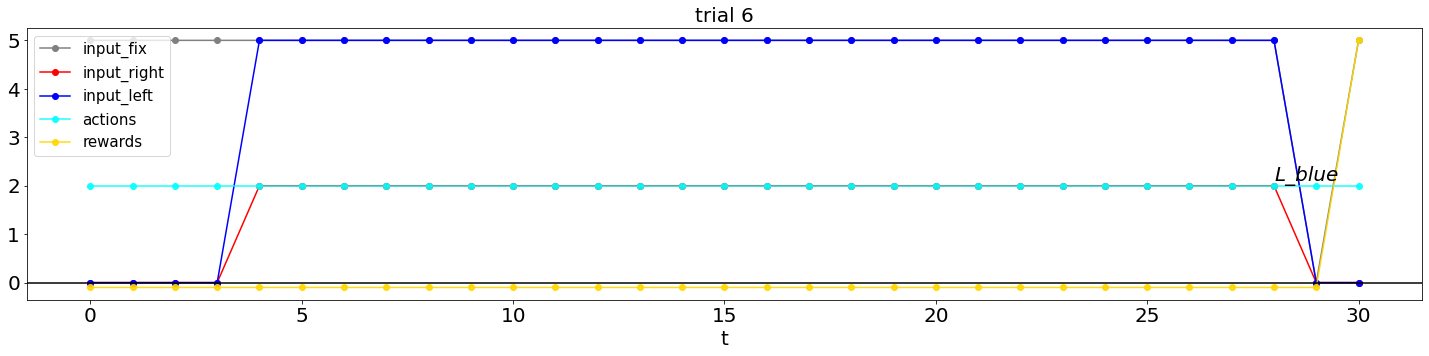

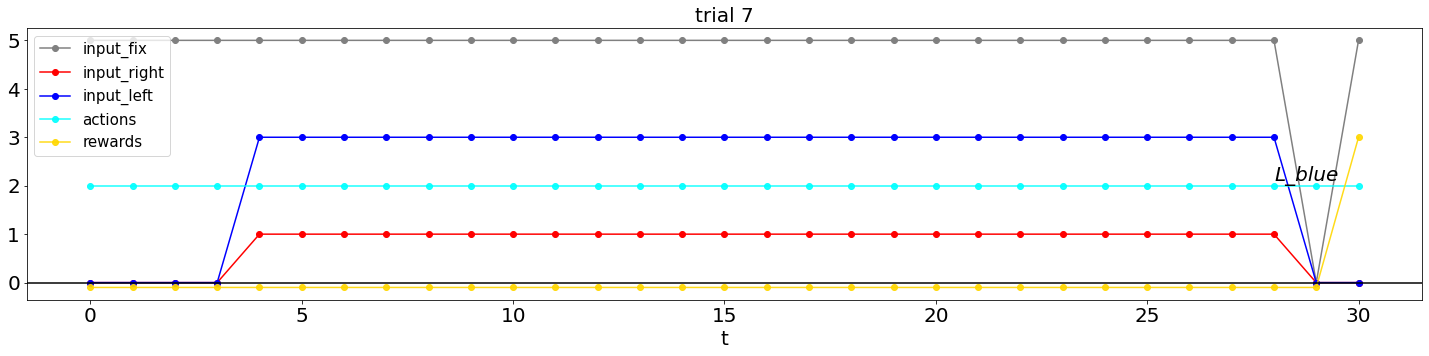

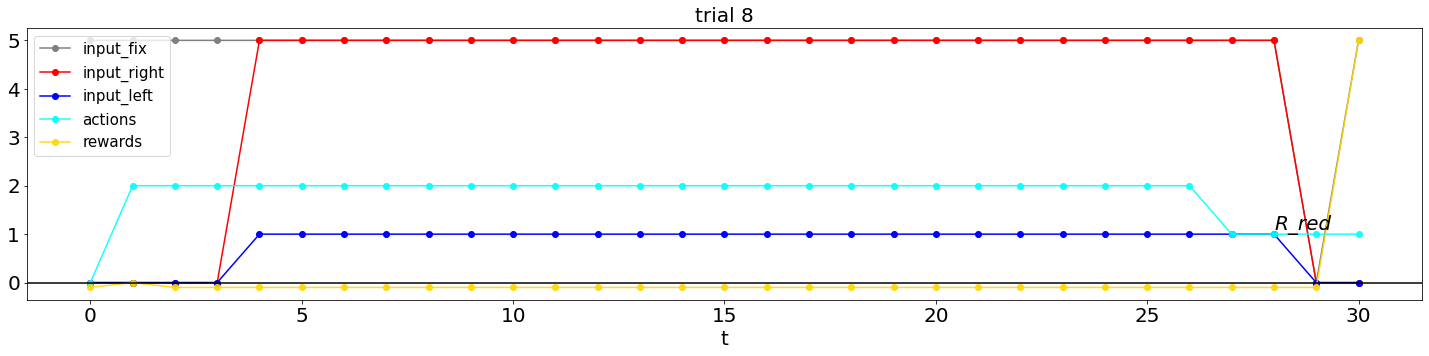

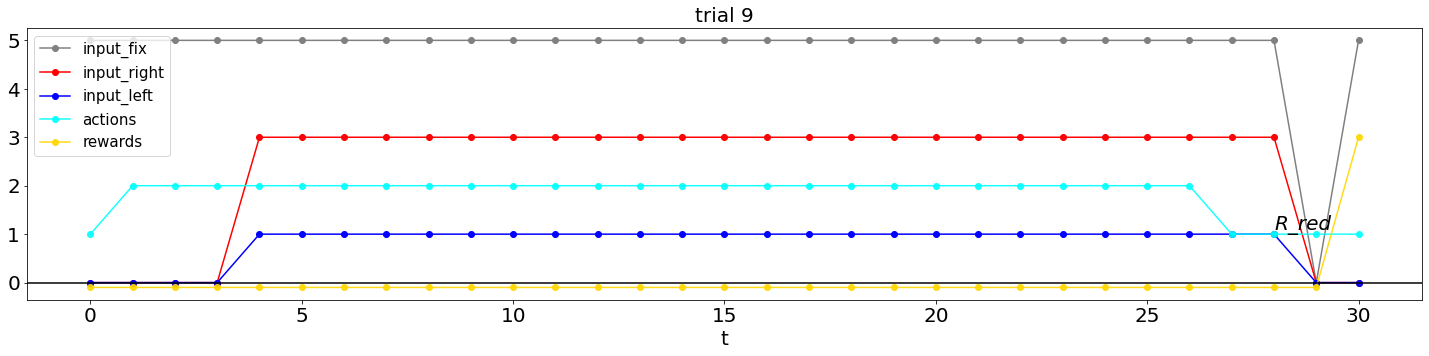

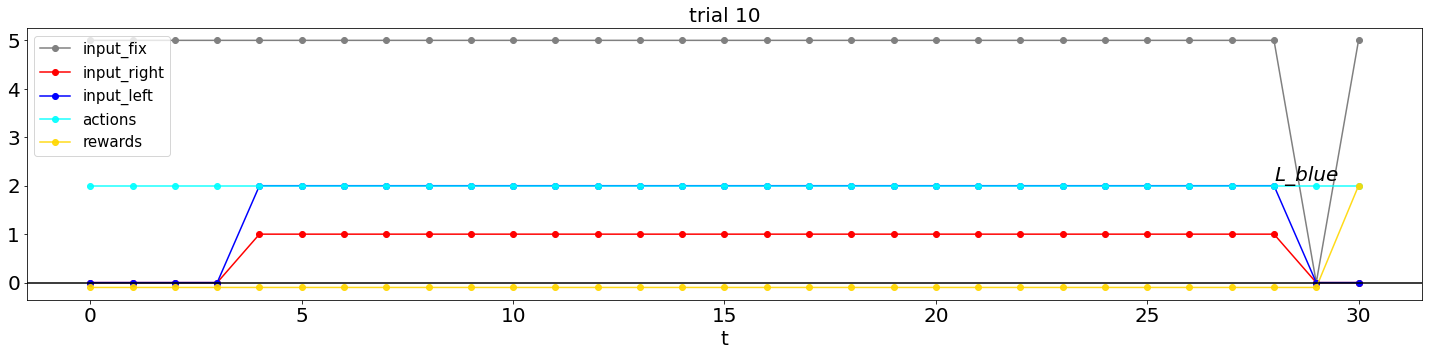

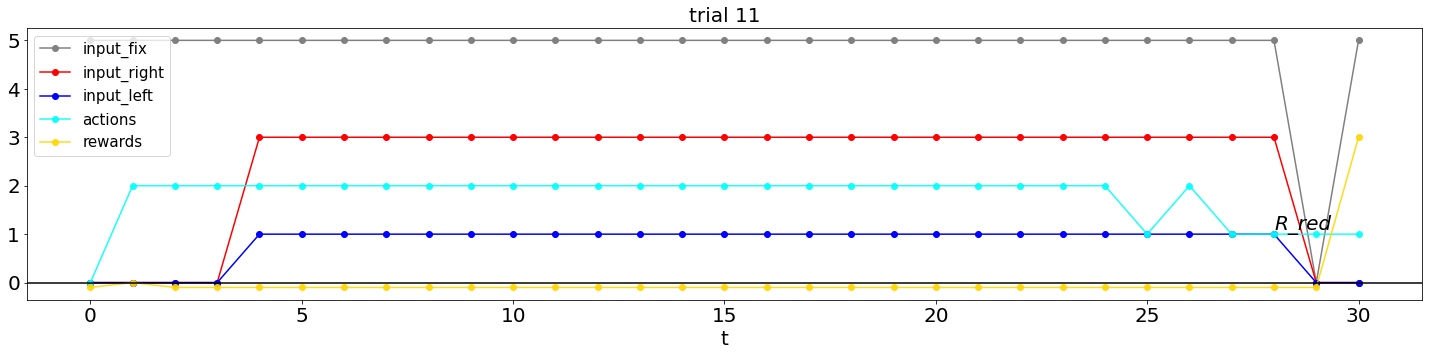

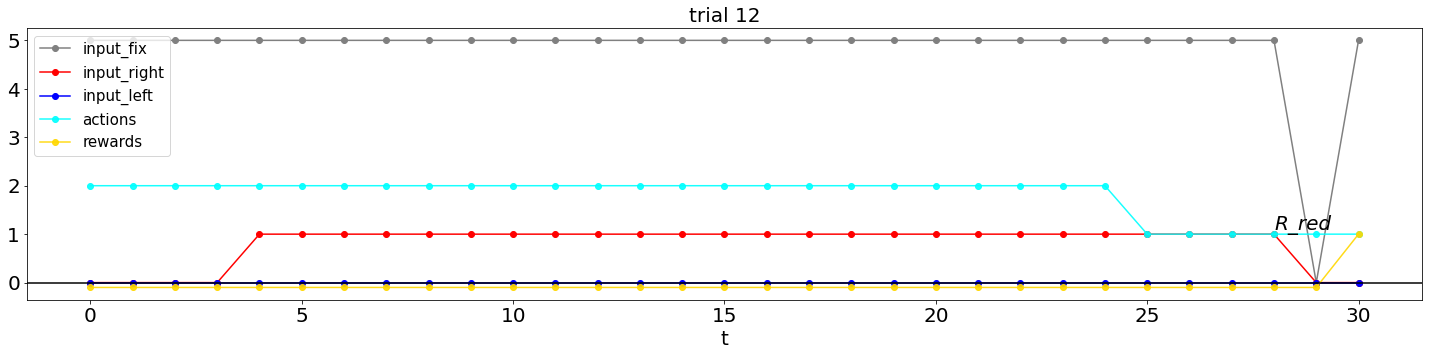

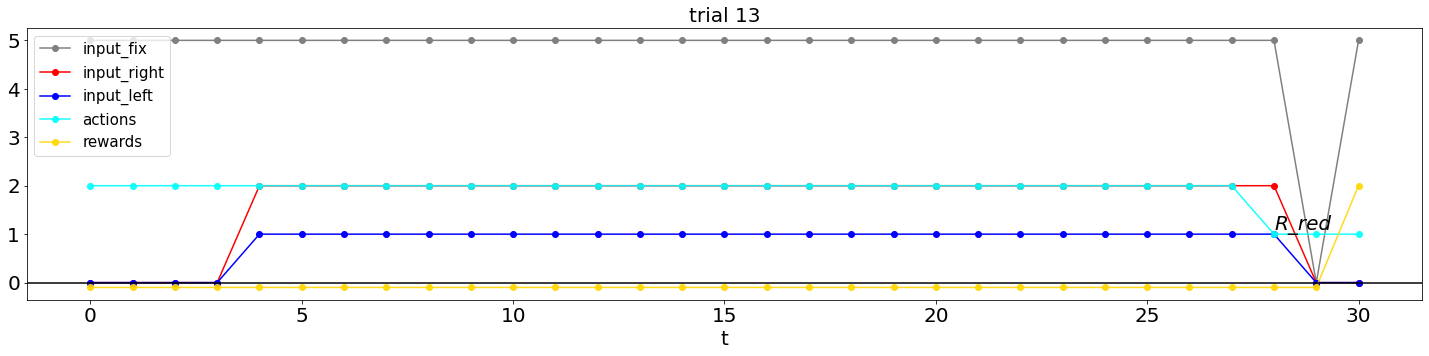

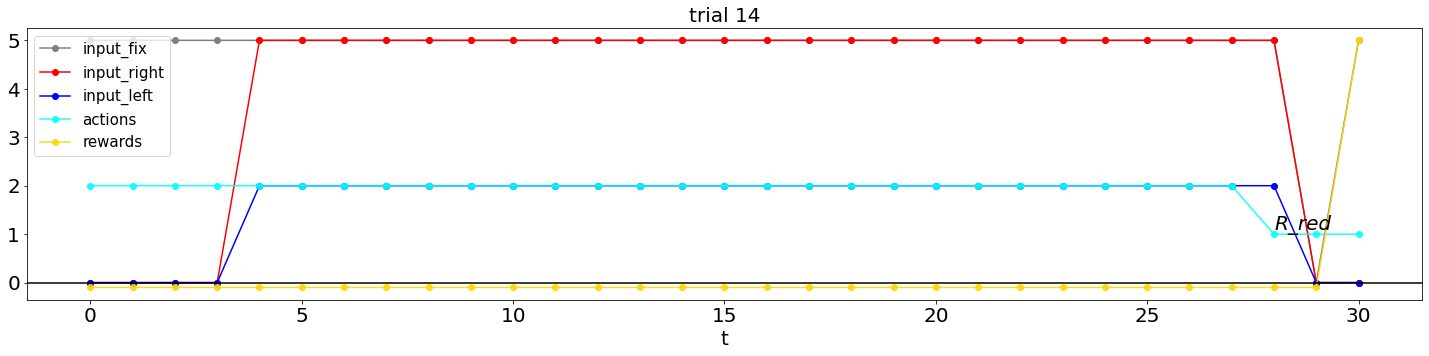

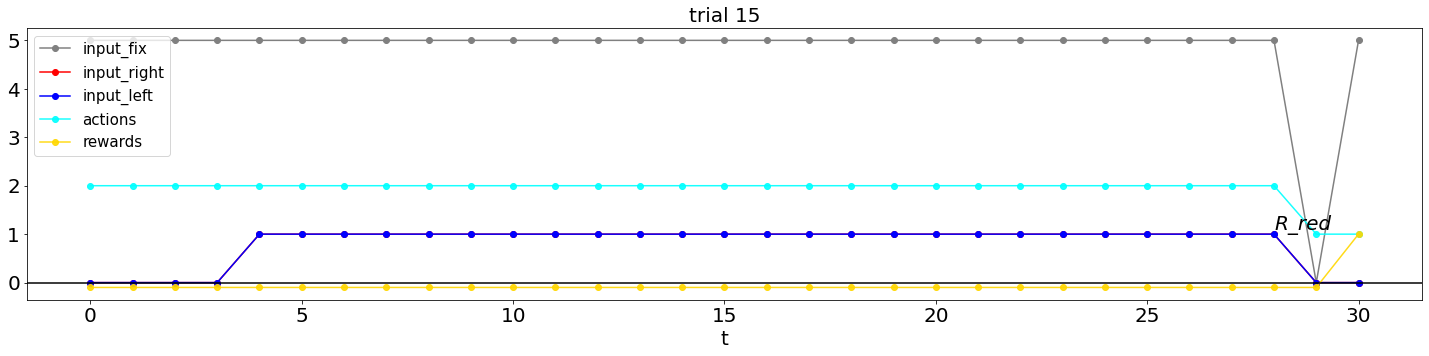

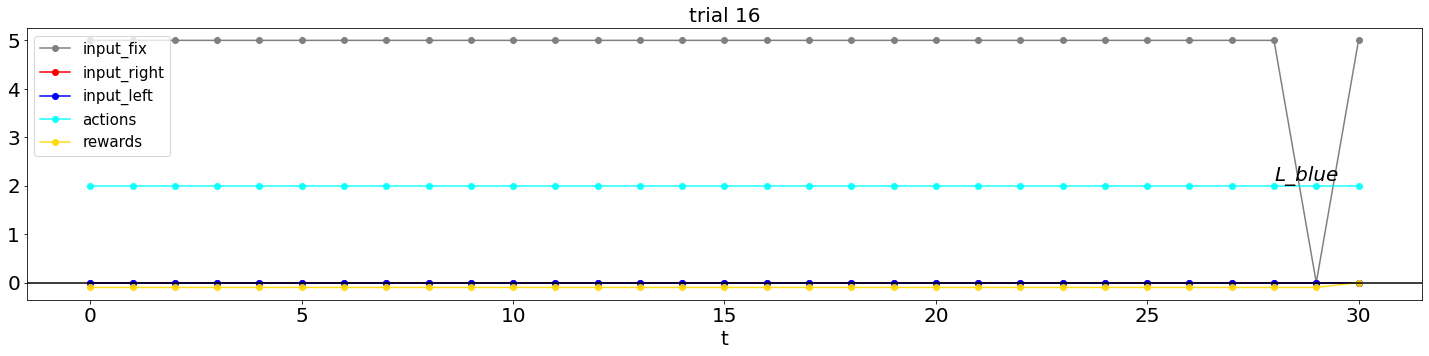

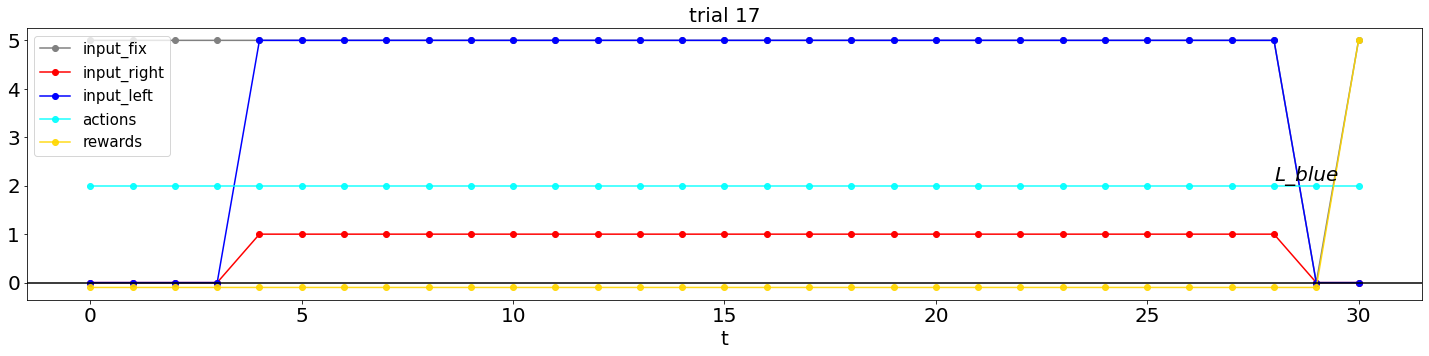

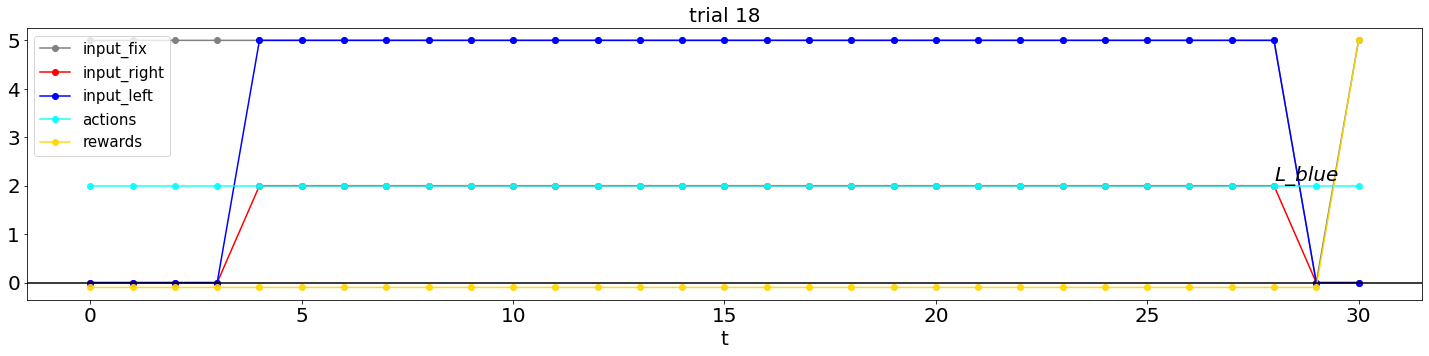

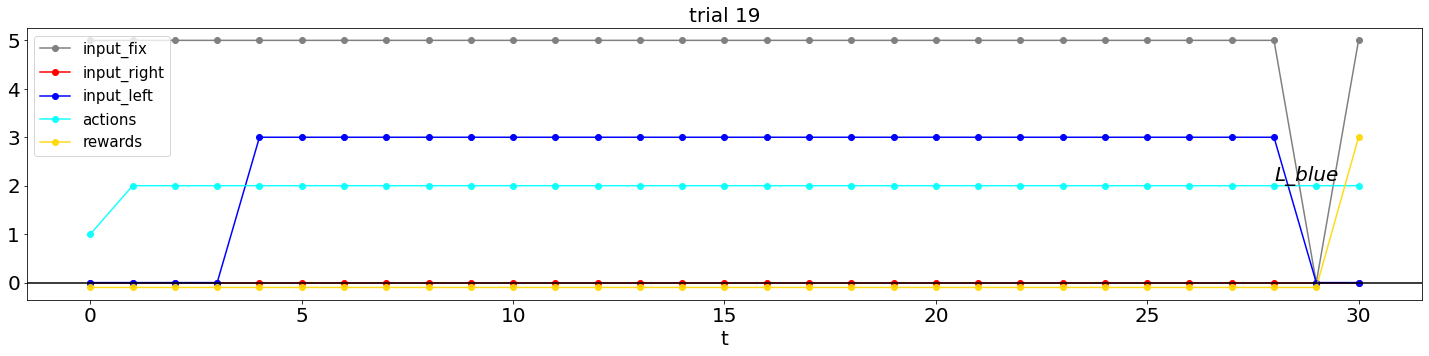

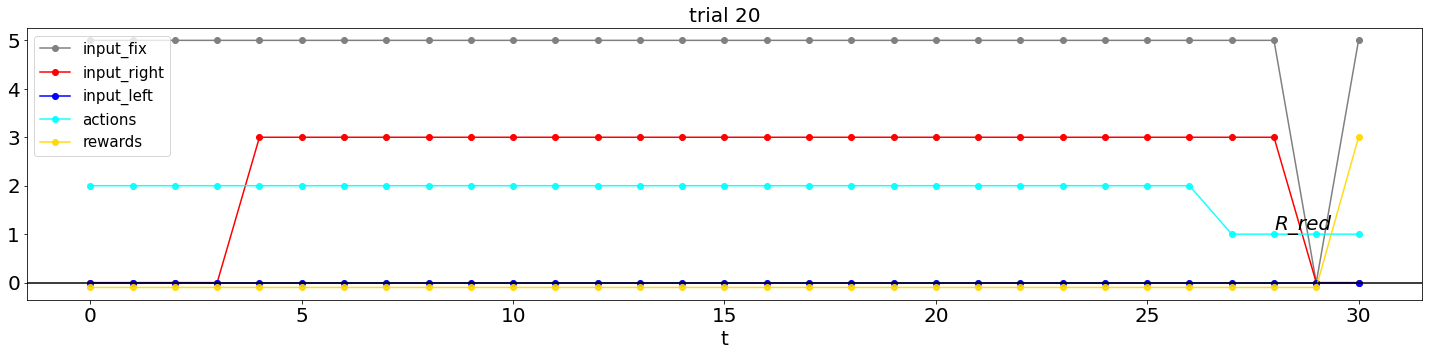

In [17]:
obs = np.asarray(observations).T
length = 0
for i in range(20):

    plt.figure(figsize=(25,5))

    start = int(trial_begins[i])
    stop = int(trial_begins[i+1])

    plt.plot(obs[0][start:stop], "-o", label="input_fix", color="gray")
    plt.plot(obs[1][start:stop], "-o", label="input_right", color="red")
    plt.plot(obs[2][start:stop], "-o", label="input_left", color="blue")
    plt.plot(actions[start:stop], "-o", label="actions", color="cyan", alpha=0.9)
    plt.plot(rewards[start:stop], "-o", label="rewards", color="gold", alpha=0.9)
    #plt.plot(cum_rho[start:stop], "-o", label="cum_rho", color="cyan", alpha=0.5)
    #plt.plot(values.clone().detach().numpy()[start:stop], "-o", label="values", color="purple", alpha=0.5)
    #plt.plot(stop-length-2, gt[i], "*", markersize=25, color="orange")
    plt.axhline(0, color="black")
    length += len(obs[0][start:stop])

    plt.xlabel("t", size=20)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.title("trial %i" %(i+1), size=20)
    if actions[start:stop][-2] == 1:
        plt.text(len(actions[start:stop])-3, 1.1, 'R_red', style='italic', fontsize=20)
    elif actions[start:stop][-2] == 2:
        plt.text(len(actions[start:stop])-3, 2.1, 'L_blue', style='italic', fontsize=20)
    plt.legend(fontsize=15, loc="upper left");